In [1]:
# About the dataset

In [2]:
'''
There are the most popular songs in the world by year and 13 variables to be explored
The top songs BY YEAR in the world by spotify. This dataset has several variables about the songs and is based on Billboard
There are the most popular songs in the world by year and 13 variables to be explored. Data were stracted from: 
http://organizeyourmusic.playlistmachinery.com/
'''

'\nThere are the most popular songs in the world by year and 13 variables to be explored\nThe top songs BY YEAR in the world by spotify. This dataset has several variables about the songs and is based on Billboard\nThere are the most popular songs in the world by year and 13 variables to be explored. Data were stracted from: \nhttp://organizeyourmusic.playlistmachinery.com/\n'

In [3]:
# Loading all the required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
# Importing dataset

In [6]:
song=pd.read_csv("C://Users//acer//Desktop//1sem//python//top spotify songs//top songs.csv",encoding="unicode_escape")

In [7]:
# looking at first few rows

In [8]:
song.head(3)

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80


In [9]:
# Looking at last few rows

In [10]:
song.tail(3)

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69
602,603,Kills You Slowly,The Chainsmokers,electropop,2019,150,44,70,-9,13,23,213,6,6,67


In [11]:
# size of dataset

In [12]:
song.shape

(603, 15)

In [13]:
# Listing all columns

In [14]:
song.columns

Index(['id', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce',
       'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [15]:
# columns data type

In [16]:
song.dtypes

id            int64
title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

In [17]:
song.describe()

,id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [18]:
# looking at null values

In [19]:
song.isna().sum()

id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [20]:
# Feature engineering

In [ ]:
# id

In [ ]:
# Lets drop this col as this is not going to affect the dependent variable

In [21]:
song.drop("id",axis=1,inplace=True)

In [ ]:
# title

In [22]:
song.drop("title",axis=1,inplace=True)

In [ ]:
# artist

In [24]:
len(song.artist.unique())

184

In [ ]:
# lets encode this using Label encoder

In [25]:
le=LabelEncoder()
song["artistt"]=le.fit_transform(song["artist"])

In [26]:
song.drop("artist",axis=1,inplace=True)

In [ ]:
# top genre

In [28]:
len(song["top genre"].unique())

50

In [29]:
le=LabelEncoder()
song["genre"]=le.fit_transform(song["top genre"])

In [30]:
song.drop("top genre",axis=1,inplace=True)

In [ ]:
# Data visualization

In [ ]:
# using histogram

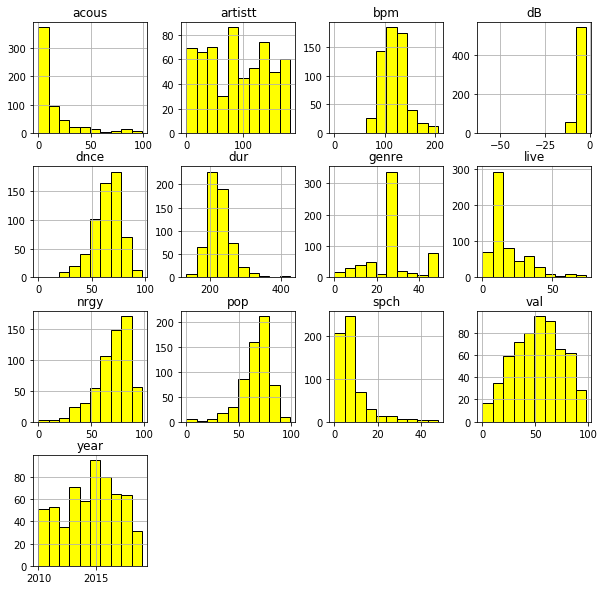

In [32]:
song.hist(figsize=(10,10),color="yellow",edgecolor="black")
plt.show()

In [ ]:
# boxplot

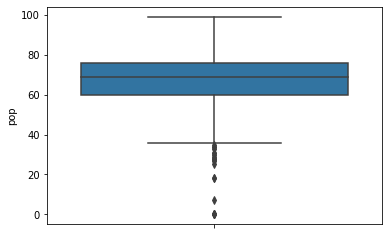

In [34]:
sns.boxplot(y=song["pop"])

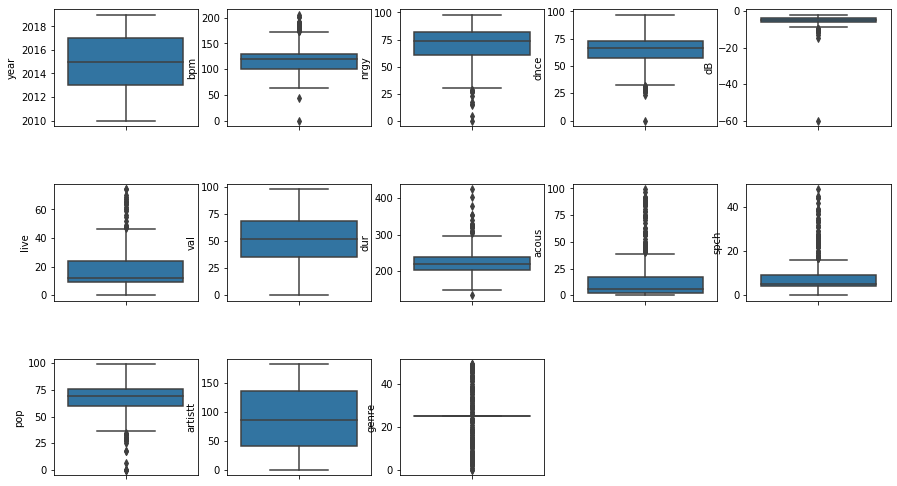

In [36]:
fig=plt.figure(figsize=(15,15))
for index,i in enumerate(song.columns):
    plt.subplot(5,5,index+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=45)
    sns.boxplot(y=song[i])

In [ ]:
# scatterplot

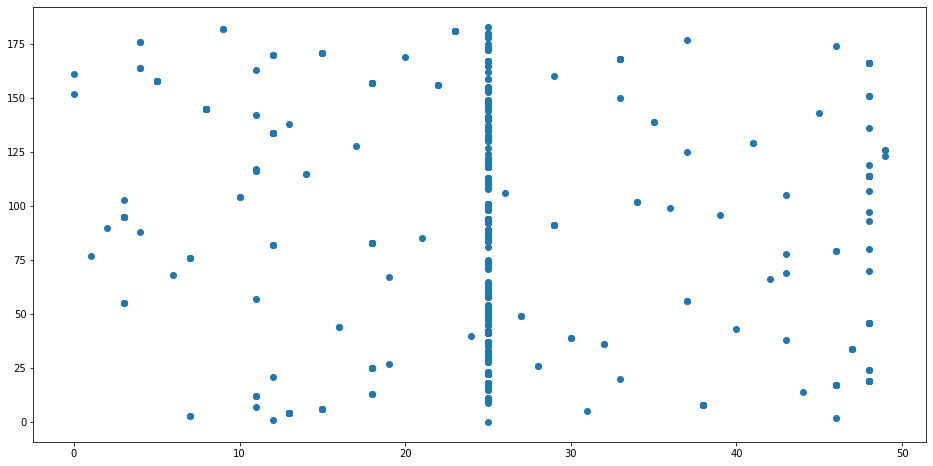

In [39]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(song["genre"],song["artistt"])

In [ ]:
# heatmap

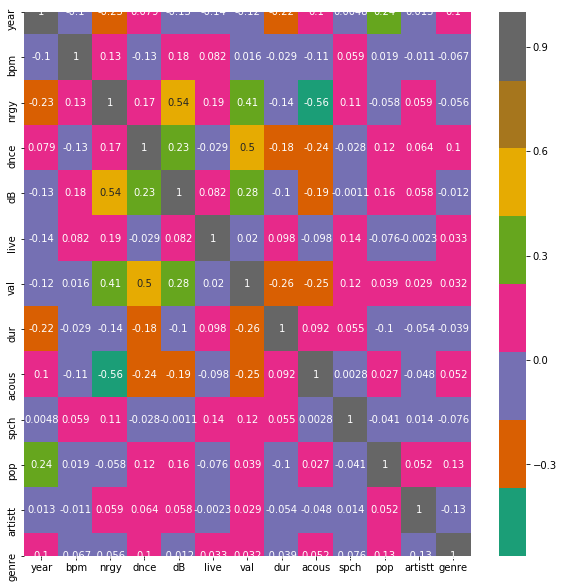

In [42]:
fig=plt.figure(figsize=(10,10))
song_corr=song.corr()
sns.heatmap(song_corr,annot=True,cmap="Dark2")

In [ ]:
# Dividing dataset into dependent and independent variables

In [43]:
y=song["pop"]
x=song.drop("pop",axis=1)

In [ ]:
# further dividing data into train and test

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
# applying ml algo

In [46]:
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

In [47]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

     Actual  Predicted
110      76  64.415819
527      78  73.736564
567      57  72.737797
77       66  60.729196
181      61  63.673480
..      ...        ...
404      68  65.759410
278      79  69.347549
490      62  67.926817
350      50  70.093967
511      84  72.021665

[199 rows x 2 columns]


In [ ]:
# Evaluating the model performance

In [49]:
print("mse is {}:".format(mean_squared_error(y_test,prediction)))
print("weights",lr.coef_)
print("intercept",lr.intercept_)
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))

mse is 206.01590895667945:
weights [ 1.38973846  0.03762112 -0.14449203  0.01535459  0.69994526 -0.0204481
  0.02782584 -0.01689039 -0.04428527 -0.06808665  0.00676624  0.14262651]
intercept -2724.9415277249063
mean abs error: 10.299995091190851
mean sq error: 206.01590895667945
root mean sq error: 14.353254298474596


In [ ]:
# decision tree

In [50]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [51]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

     Actual  Predicted
110      76       69.0
527      78       76.0
567      57       62.0
77       66       73.0
181      61       69.0
..      ...        ...
404      68       68.0
278      79       81.0
490      62       72.0
350      50       44.0
511      84       68.0

[199 rows x 2 columns]


In [52]:
print("mse is {}:".format(mean_squared_error(y_test,prediction)))
print("weights",lr.coef_)
print("intercept",lr.intercept_)
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))

mse is 332.7286432160804:
weights [ 1.38973846  0.03762112 -0.14449203  0.01535459  0.69994526 -0.0204481
  0.02782584 -0.01689039 -0.04428527 -0.06808665  0.00676624  0.14262651]
intercept -2724.9415277249063
mean abs error: 13.452261306532664
mean sq error: 332.7286432160804
root mean sq error: 18.240850945503624


In [ ]:
# using random forest

In [53]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

     Actual  Predicted
110      76       62.0
527      78       65.7
567      57       69.3
77       66       62.9
181      61       56.9
..      ...        ...
404      68       69.0
278      79       66.8
490      62       69.9
350      50       62.9
511      84       72.2

[199 rows x 2 columns]


In [55]:
print("mse is {}:".format(mean_squared_error(y_test,prediction)))
print("weights",lr.coef_)
print("intercept",lr.intercept_)
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))

mse is 231.56999999999996:
weights [ 1.38973846  0.03762112 -0.14449203  0.01535459  0.69994526 -0.0204481
  0.02782584 -0.01689039 -0.04428527 -0.06808665  0.00676624  0.14262651]
intercept -2724.9415277249063
mean abs error: 11.126130653266333
mean sq error: 231.56999999999996
root mean sq error: 15.217424223566876


In [ ]:
'''
Hence we can conclude that our Linear regression model best fit the dataset with least error
'''